# <span style="color:green"> ESERCITAZIONE 7 </span>

### <span style="color:blue">  Esercizio 07.1</span>

<span style="color:blue"> Nel codice MD/MC fornito, aggiungere le correzioni di coda per l'energia potenziale $U$ e per la pressione $P$.</span>

Nell'Esercitazione $4$, abbiamo utilizzato il codice MD/MC senza tener conto delle correzioni di coda. L'obiettivo di questo esercizio è di aggiungerle. 

Il sistema che stiamo studiando è sottoposto al **potenziale di Lennard-Jones**, che **ha** una **componente repulsiva**, quando le particelle sono molto vicine **e** una **componente attrattiva**, quando le particelle sono ad una distanza che va dalla distanza di equilibrio (dell'ordine del raggio di Bohr) fino all'infinito. 

Supponiamo che una particella sia al centro di un cerchio di raggio $r\_cut$, dell'ordine del raggio di Bohr: nell'Esercitazione $4$ abbiamo supposto che la particella interagisca solo con le particelle contenute in questo cerchio. In realtà la **particella** non **interagisce** solo con le sue vicine, ma **con tutte le particelle del sistema**. Se supponiamo che la particella interagisca solo con le più vicine, consideriamo solo le forze repulsive a piccola distanza e trascuriamo le **forze attrattive a lunga distanza**: stiamo tagliando la coda della curva del potenziale.

In questo esercizio ci proponiamo di **aggiungere la coda del potenziale**, detta *tail correction*, in modo da considerare il vero potenziale di interazione di una particella con tutte le altre. Nel codice è stata aggiunta una funzione che calcola le tail correction per l'energia potenziale e per la pressione. I risultati per le correzioni di coda per i tre stati della materia sono: 
1. stato solido: $v\_tail=-0.949199$, $p\_tail=-3.7968$;
2. stato liqido: $v\_tail=-0.342677$, $p\_tail=-1.37071$;
3. stato gassoso: $v\_tail=-0.000167548$, $p\_tail=-0.000670192$.

Possiamo notare che sono tutti **negativi**. Questo è coerente con la descrizione del potenziale di interazione. La tail correction aggiunge la componente del potenziale a grande distanza che è un **contributo attrattivo** quindi con segno meno. Inoltre se le particelle in media si respingono di meno, urtano di meno tra di loro e sarà **minore la pressione** del sistema. Questo spiega anche il segno meno della tail correction della pressione. 

Le tail correction sono maggiori in modulo per lo stato solido, più piccole di circa la metà per lo stato liquido e di ordine $10^{-4}$ per lo stato gassoso. Questo perché **fuori dal cerchio** di raggio $r\_cut$, per ogni particella nello stato solido **ci sono molte più particelle con cui interagire** in maniera attrattiva, rispetto allo stato liquido che è meno denso. Per lo stato gassoso invece che è molto meno denso degli altri, fuori da questo cerchio di particelle quasi non ce ne sono. 

### <span style="color:blue">  Esercizio 07.2</span>

<span style="color:blue"> Usare il codice MD/MC fornito per calcolare i valori istantanei di $U/N$, tramite simulazioni Monte Carlo equilibrate, per $M=5\times10^{5}$ blocchi di un elemento ciascuno. Il tasso di accettazione di Metropolis è del $50\%$. Calcolare i valori per i tre stati della materia, usando i dati forniti dal problema. </span> 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

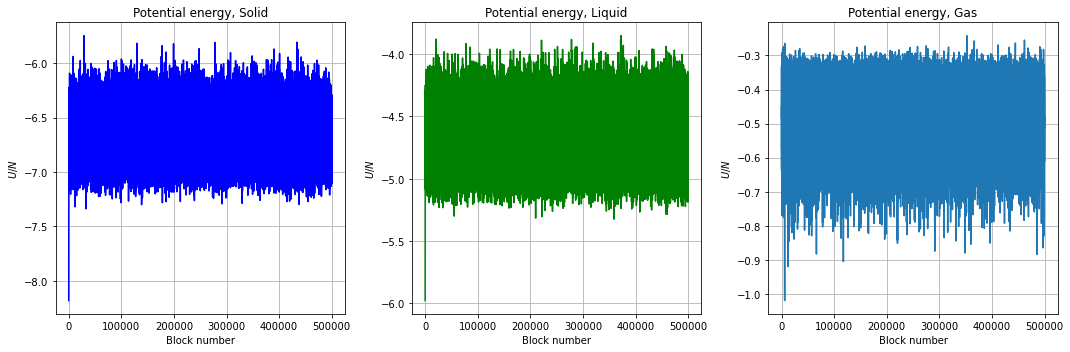

In [2]:
plt.figure(figsize=(15,5))

plt.subplot(131)
x, y = np.loadtxt("solid/test_epot_solid_MC.dat", unpack='true')
plt.plot(x, y, color='blue')
plt.title("Potential energy, Solid")
plt.xlabel("Block number")
plt.ylabel("$U/N$")
plt.grid(True)

plt.subplot(132)
x, y = np.loadtxt("liquid/test_epot_liquid_MC.dat", unpack='true')
plt.plot(x, y, color='green')
plt.title("Potential energy, Liquid")
plt.xlabel("Block number")
plt.ylabel("$U/N$")
plt.grid(True)

plt.subplot(133)
x, y = np.loadtxt("gas/test_epot_gas_MC.dat", unpack='true')
plt.plot(x, y)
plt.title("Potential energy, Gas")
plt.xlabel("Block number")
plt.ylabel("$U/N$")
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue"> 1. Calcola la funzione di autocorrelazione di $U/N$ per i tre casi, per stimare quanto dovrebbero essere lunghi i blocchi della simulazione. </span>

I grafici da sinistra a destra rappresentano i $5\times10^{5}$ valori di $U/N$ per gli stati solido, liquido e gassoso. Osserviamo che i valori sono **autocorrelati**. Quando facciamo le simulazioni numeriche, se consideriamo due valori consecutivi molto **vicini** tra di loro **nel tempo**, osserviamo che questi valori sono autocorrelati, ossia sono molto simili tra di loro. Questo succede quando il sistema ha già svolto i suoi cicli di equilibrazione. Quando il **sistema è all'equilibrio**, i valori che può assumere si trovano in un intorno di un **valore ideale** e se prendiamo due valori consecutivi **vicinissimi** tra di loro, questi saranno **molto simili**, perché il sistema si sarà spostato di pochissimo. Se invece paragoniamo un valore iniziale ad un valore estratto **molto lontano nel tempo**, ossia dopo tantissime estrazioni, troveremo che i due valori **non saranno correlati** tra di loro perché il sistema nel frattempo ha fatto una grande evoluzione. 

Se misuriamo un primo evento $m(t')$ al tempo $t'$ e se misuriamo un secondo evento $m(t'+t)$ al tempo $t'+t$, distante di un tempo $t$ dal primo evento, essendo $t_{max}$ la durata della simulazione, ossia il numero di coppie di elementi contenute nel blocco avendo scelto $t$ come distanza tra i due elementi, la **funzione di autocorrelazione** tra i due eventi $m(t')$ e $m(t'+t)$ è:

\begin{equation}
   \chi(t) = \frac{\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t')m(t'+t)-\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t')\times    \frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}m(t'+t)} {\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}m^{2}(t')-
   \left(\frac{1}{t_{max}}\sum_{t'=0}^{t_{max}}m(t')\right)}.
\end{equation}

L'**andamento della funzione** di autocorrelazione è **esponenziale decrescente**. Per valori consecutivi la correlazione è alta e paragonando il primo evento con eventi estratti sempre più lontani nel tempo, la correlazione diminuisce fino ad annullarsi. Vorremmo studiare la funzione di autocorrelazione per **trovare il tempo $t$** tale per cui due **valori estratti non sono più autocorrelati**. Dopodiché è possibile **calcolare la lunghezza ideale del blocco** della simulazione. Nella formula osserviamo che quando $t$ aumenta fino a raggiungere $t_{max}$, ossia la **distanza tra due eventi** selezionati diventa sempre più **grande**, il limite superiore della sommatoria diventa piccolo. Con questa grande distanza $t$ posso **selezionare meno eventi** all'interno della simulazione per farne la media (caso limite: prendo solo il primo e l'ultimo evento del blocco). Di conseguenza l'**errore statistico di $\chi(t)$ sarà maggiore**.

Qui sotto segue lo **specchietto risolutivo** per il calcolo di $\chi(t)$. L'indice $t_{max}$ corrisponde al $t_{max}$ della formula sopra, mentre l'indice $t$ corrisponde a $t^{'}$. Per come è impostata la formula, l'indice $t^{'}$ aumenta di $1$ alla volta fino ad arrivare a $t_{max}$ e a $t_{max}-t$. Ma noi non vogliamo calcolare $\chi(t)$ per tutte le distanze, dall'elemento con se stesso fino al $500.000$esimo, a distanza prima di $0$, poi di $1$, ... , poi di $6000$, ... , poi di $30.000$, ... , fino a $500.000$. Per questo poniamo un tetto massimo a $t$: il valore $tau_{max}$, che rappresenta il limite fino al quale dobbiamo far crescere di $1$ alla volta $t^{'}$ per calcolare le sommatorie nella formula di $\chi(t)$. Pongo $tau_{max}=1000$ perché è il valore fino al quale gli elementi sono autocorrelati. A questo punto, nello specchietto $tau$ sostituisce $t$ ed è un intero compreso in $[0,1000]$. Con queste distanze $tau$ il codice scorre su tutto il file di dati e calcola $\chi(t)$ per tutti i valori di $tau$. 

Eseguo il calcolo per i tre stati della materia: solido, liquido e gassoso. Ci aspettiamo che la funzione di autocorrelazione $\chi(t)$ sia $1$ per la distanza $t^{'}=0$, ossia per i prodotti elemento con se stesso e che arrivi gradualmente, mediante una funzione  esponenziale decrescente, a $0$ per $t^{'}=1000$, ossia quando gli elementi sono così distanti da non essere più correlati tra loro.

<span style="color:blue"> a. $\chi(t)$ per lo stato solido. </span>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Definisco i limiti delle sommatorie: uguali per i tre casi.

t_max = 500000
#Numero di elementi del file, ossia numero di distanze possibili tra le coppie. Esempi:
#0: prodotto di un elemento con se stesso, 1: prodoto di un elemento con il suo vicino, 
#1000: prodotto di un elemento con chi è 1000 posizioni più avanti,
#500.000: prodotto tra il primo e l'ultimo elemento del file (caso ideale).

tau_max = 1000
#Distanza massima fissata tra gli elementi del file con cui calcolare chi(t).
#tau cresce da 0 a 1000 che è il valore fino al quale gli elementi sono correlati. 
#Calcola i prodotti tra le coppie a distanza: 0, 1, ... , 1000, scorrendo tutto il file.

In [4]:
#Definisco i vettori per lo stato solido.

m_s = np.loadtxt("solid/test_epot_solid_MC.dat", usecols=(1), unpack='true')
#Vettore con le 500.000 misure di $U/N$ con cui calcolo chi usando la formula sopra.
chi_s = []
#Vettore con le chi. All'inizio lo defisco vuoto, poi aggiungerò uno alla volta 
#tutti i valori calcolati con tau = 0 fino a tau = 1000 usando la funzione append().

#Le sommatorie vengono inizializzate a zero ad ogni ciclo.
for tau in range(tau_max):
    sum_a = 0
    sum_b = 0
    sum_c = 0
    sum_d = 0
    sum_e = 0
    
#Calcolo i cinque prodotti delle cinque sommatorie.
    for t in range(t_max-tau):
        sum_a += m_s[t]*m_s[t+tau]
        sum_b += m_s[t]
        sum_c += m_s[t+tau]
        
    for t in range(t_max):
        sum_d += m_s[t]*m_s[t]
        sum_e += m_s[t]

#Calcolo i fattori che precedono numeratore e denominatore.
    fat_n = 1.0/(t_max-tau)
    fat_d = 1.0/t_max

#Calcolo di chi. chi_tau è il risultato dell'applicazione della formula sopra.
#Calcolo chi_tau per tutti gli elementi di tau, da 0 a 1000. 
#Aggiungo un chi_tau alla volta al vettore delle chi, così ho tutte le 1000 chi.
    chi_tau = (fat_n*sum_a-fat_n*fat_n*sum_b*sum_c)/(fat_d*sum_d-fat_d*fat_d*sum_e*sum_e)
    chi_s.append(chi_tau) 
    
print("Finito!")
#La simulazione per lo stato solido dura 20 minuti. Quando viene stampata questa scritta significa che ha finito.

Finito!


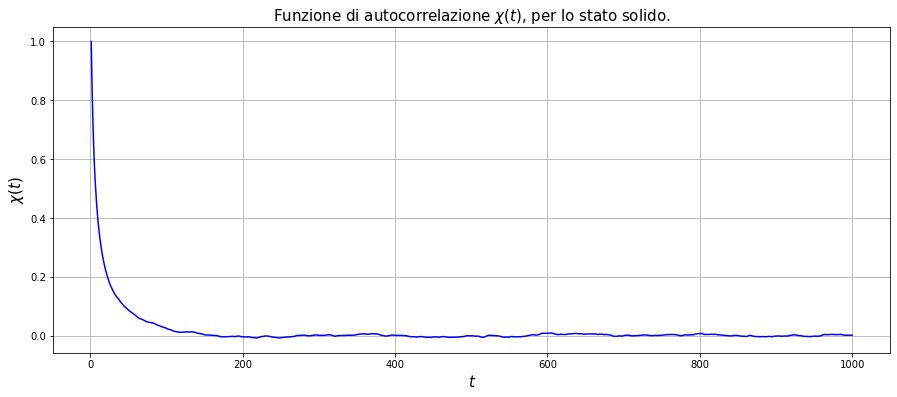

In [5]:
#Faccio il grafico della funzione di autocorrelazione per lo stato solido.
plt.figure(figsize=(15,6))

x = np.arange(0,tau_max,1)+1
#Sono le x del grafico, i valori di tau per cui calcolo chi, tra 0 e tau_max = 1000, a distanza di 1.
#Aggiungo 1 in modo che il primo elemento si chiami 1 e non 0 e così tutti gli altri. 
y = chi_s
#Sono le y del grafico, i valori della funzione di autocorrelazione chi. 
plt.plot(x,y, color='blue')
#Disegno il grafico per i due vettori di coordinate.

plt.title("Funzione di autocorrelazione $\chi(t)$, per lo stato solido.", fontsize=15)
plt.xlabel("$t$", fontsize=15)
plt.ylabel("$\chi(t)$", fontsize=15)
#Metto i titoli al grafico e agli assi.

plt.grid(True)
plt.show()

<span style="color:blue"> b. $\chi(t)$ per lo stato liquido. </span>

In [3]:
#Valgono gli stessi commenti per il caso dello stato solido.
#Definisco i vettori per lo stato liquido.
m_l = np.loadtxt("liquid/test_epot_liquid_MC.dat", usecols=(1), unpack='true')
chi_l = []

for tau in range(tau_max):
    sum_a = 0
    sum_b = 0
    sum_c = 0
    sum_d = 0
    sum_e = 0
    
    for t in range(t_max-tau):
        sum_a += m_l[t]*m_l[t+tau]
        sum_b += m_l[t]
        sum_c += m_l[t+tau]
        
    for t in range(t_max):
        sum_d += m_l[t]*m_l[t]
        sum_e += m_l[t]

    fat_n = 1.0/(t_max-tau)
    fat_d = 1.0/t_max

    chi_tau = (fat_n*sum_a-fat_n*fat_n*sum_b*sum_c)/(fat_d*sum_d-fat_d*fat_d*sum_e*sum_e)
    chi_l.append(chi_tau) 
    
print("Finito!")
#La simulazione dura 11 minuti per lo stato liquido.

Finito!


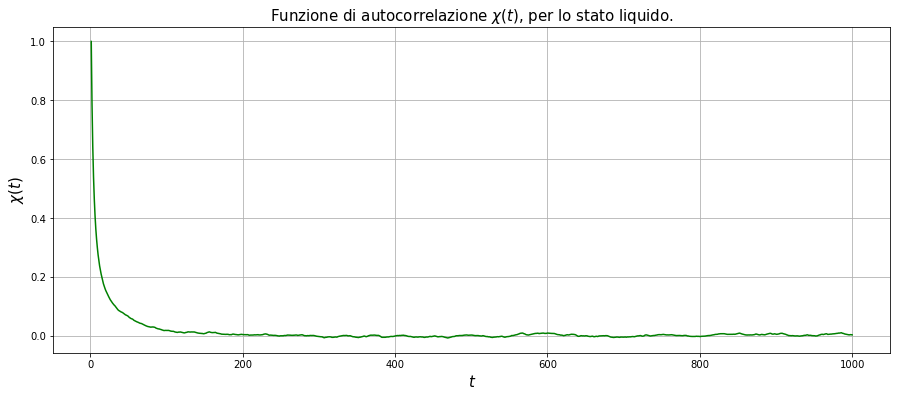

In [4]:
#Faccio il grafico della funzione di autocorrelazione per lo stato liquido.
plt.figure(figsize=(15,6))

x = np.arange(0,tau_max,1)+1
y = chi_l
plt.plot(x,y, color='green')

plt.title("Funzione di autocorrelazione $\chi(t)$, per lo stato liquido.", fontsize=15)
plt.xlabel("$t$", fontsize=15)
plt.ylabel("$\chi(t)$", fontsize=15)

plt.grid(True)
plt.show()

<span style="color:blue"> c. $\chi(t)$ per lo stato gassoso. </span>

In [5]:
#Valgono gli stessi commenti per il caso dello stato solido.
#Definisco i vettori per lo stato gassoso.
m_g = np.loadtxt("gas/test_epot_gas_MC.dat", usecols=(1), unpack='true')
chi_g = []

for tau in range(tau_max):
    sum_a = 0
    sum_b = 0
    sum_c = 0
    sum_d = 0
    sum_e = 0
    
    for t in range(t_max-tau):
        sum_a += m_g[t]*m_g[t+tau]
        sum_b += m_g[t]
        sum_c += m_g[t+tau]
        
    for t in range(t_max):
        sum_d += m_g[t]*m_g[t]
        sum_e += m_g[t]

    fat_n = 1.0/(t_max-tau)
    fat_d = 1.0/t_max

    chi_tau = (fat_n*sum_a-fat_n*fat_n*sum_b*sum_c)/(fat_d*sum_d-fat_d*fat_d*sum_e*sum_e)
    chi_g.append(chi_tau) 
    
print("Finito!")
#La simulazione dura 12 minuti per lo stato gassoso.

Finito!


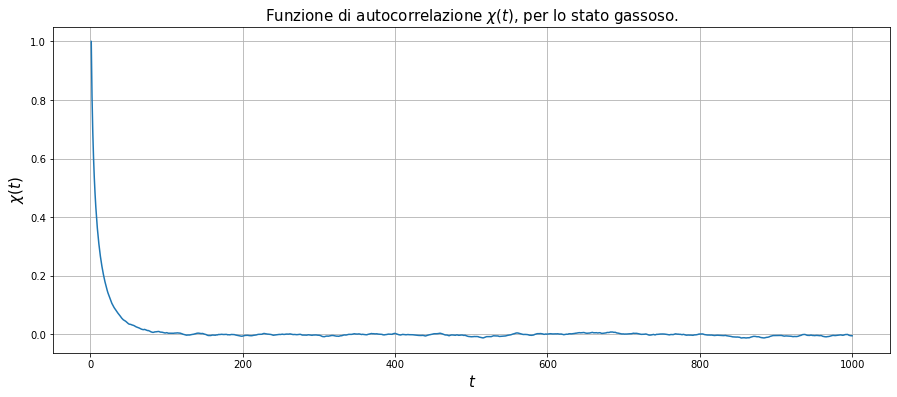

In [6]:
#Faccio il grafico della funzione di autocorrelazione per lo stato gassoso.
plt.figure(figsize=(15,6))

x = np.arange(0,tau_max,1)+1
y = chi_g
plt.plot(x,y)

plt.title("Funzione di autocorrelazione $\chi(t)$, per lo stato gassoso.", fontsize=15)
plt.xlabel("$t$", fontsize=15)
plt.ylabel("$\chi(t)$", fontsize=15)

plt.grid(True)
plt.show()

### Osservazioni

In tutti e tre i casi, la **funzione di autocorrelazione** si attenua entro i $200$ passi Monte Carlo. Per passo Monte Carlo si intende la distanza tra un elemento quello successivo, ossia quello generato subito dopo. Il tempo Monte Carlo $t$ si misura in passi Monte Carlo. La funzione **decresce come un'esponenziale** fino a raggiungere lo $0$. Una volta attenuatasi oscilla attorno all'asse $x$, seppur di pochissimo e non fa perfettamente $0$. Questo indica che un minimo di correlazione c'è sempre. Il **numero di passi** Monte Carlo in cui la funzione si attenua è diverso per i tre stati: solido $\simeq 150$, liquido $\simeq 120$, gassoso $\simeq 80$. Questo potrebbe ricondursi alla natura delle particelle che si trovano in quel determinato stato: legate tra loro nello stato solido, in moto relativo l'una all'altra nello stato liquido e libere di muoversi nello stato gassoso. Per questo nello stato solido le energie delle particelle sono maggiormente correlate tra loro.

<span style="color:blue"> 2. Usa gli stessi dati per studiare l'incertezza statistica per il valori di $U/N$, per differenti valori della lunghezza del blocco, da $L=10$ a $L=5\times10^{3}$. </span>

Seguono gli specchietti, per i tre stati della materia, per il calcolo dell'incertezza statistica in funzione della lunghezza del blocco. Il calcolo viene eseguito per $101$ valori di $L$ che vanno da $10$ a $5\times10^{3}$: sono i multipli di $50$ (più il $10$) in questo intervallo. Questi valori sono caricati nel vettore $L$ da un file esterno. 

In [7]:
#Variabili del problema:
#i, j e iblk sono contatori: indice di lunghezza, indice di elemento e indice di blocco.
#l: lunghezza selezionata nel vettore di tutte le lunghezze L.
#mean, media del blocco.
#square, quadrato della media del blocco.
#sum_mean, Somma degli elementi del vettore medie.
#sum_square, Somma degli elementi del vettore dei quadrati.
#mean_mean, Media delle medie.
#mean_square, Media dei quadrati delle medie.
#varianza, stdev (deviazione standard), incertezza.

#Il triplo ciclo for:
#Il primo ciclo seleziona la lunghezza del blocco del quale calcoliamo l'incertezza.
#iblk*l: inizio del blocco = numero totale di elementi nei blocchi precedenti.
#(iblk+1)*l: fine del blocco = numero totale di elementi precedenti + di questo blocco.
#L'indice i scorre su tutti gli elementi contenuti nel blocco iblk-esimo. Fa la somma degli elementi
#selezionati nel vettore, poi al ciclo successivo riparte dal punto a cui era arrivato.

#Librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Numero di elementi
M = 500000 #Numero di lanci = dimensione del vettore m = tutti i valori dell'energia per particella.
L = np.loadtxt("lenght.dat", unpack='true') #Vettore con le lunghezze possibili dei blocchi.

#Vettori con le energie da suddividere in blocchi e vettori con le loro incertezze.
m_s = np.loadtxt("solid/test_epot_solid_MC.dat", usecols=(1), unpack='true') #Vettore con le energie, stato solido.
err_s = [] #Vettore con le incertezze, stato solido.
m_l = np.loadtxt("liquid/test_epot_liquid_MC.dat", usecols=(1), unpack='true') #Vettore con le energie, stato liquido.
err_l = [] #Vettore con le incertezze, stato liquido.
m_g = np.loadtxt("gas/test_epot_gas_MC.dat", usecols=(1), unpack='true') #Vettore con le energie, stato gassoso.
err_g = [] #Vettore con le incertezze, stato gassoso.

#Variabili del problema che si accumulano come sommatorie.
somma = 0 #Somma degli elementi del vettore.   
sum_mean = 0 #Somma delle medie.
sum_square = 0 #Somma dei quadrati delle medie.

<span style="color:blue"> a. Incertezza statistica in funzione di $L$ per $U/N$ per lo stato solido. </span>

In [8]:
#Specchietto che calcola l'andamento dell'incertezza statistica in funzione della lunghezza del blocco.
for i in range(0,101,1): #Per tutte le lunghezze definite nel vettore L.
    l = int(L[i]) #Lunghezza selezionata in questo ciclo.
    N = int(M/l) #Calcolo il numero di blocchi.
    sum_mean = 0
    sum_square = 0
    
    for iblk in range(0,N,1): #iblk va da 0 a N (escluso) a passi di 1. Per ogni blocco,
        somma = 0 #Azzero la somma ad ogni ciclo.
        for j in range(iblk*l,(iblk+1)*l,1): #all'interno di ciascun blocco.
            somma += m_s[j]
        
        media = somma/l #Calcolo il valore della media di indice iblk ...
        quadrato = media*media #Calcolo il valore del quadrato di indice iblk ...
        #... e li sommo ai valori calcolati nei blocchi precedenti. In questo esercizio ci interessano 
        #solo i valori finali e non di ogni singolo blocco per fare il grafico della media a blocchi.
    
        sum_mean += media 
        sum_square += quadrato     
        mean_mean = sum_mean/(iblk+1)
        mean_square = sum_square/(iblk+1)
       
        if(iblk == 0): #Nel caso in cui si abbia un solo blocco, l'incertezza statistica è posta a 0.
            varianza = 0
            stdev = 0
            incertezza = 0   
        else:
            varianza = mean_square - mean_mean*mean_mean #Varianza per la media di 1 blocco, 2 blocchi, ... , N blocchi,
            stdev = np.sqrt(varianza) #lo stesso per la deviazione standard.
            incertezza = stdev/(np.sqrt(iblk)) #Incertezza stastistica del valor medio, se sono stati generati iblk blocchi.
        #Nella formula dell'incertezza statistica si divide per un fattore radice di N-1. Dato che il primo elemento del vettore
        #è il numero zero, N è già ridotto di 1. Quindi nella formula divido per la radice di N, ossia per iblK blocchi.
        
    err_s.append(incertezza) #Calcolata l'incertezza per il blocco di lunghezza l, la aggiungo al vettore err_s.

print("Finito!") #Questa simulazione dura 10 secondi.

Finito!


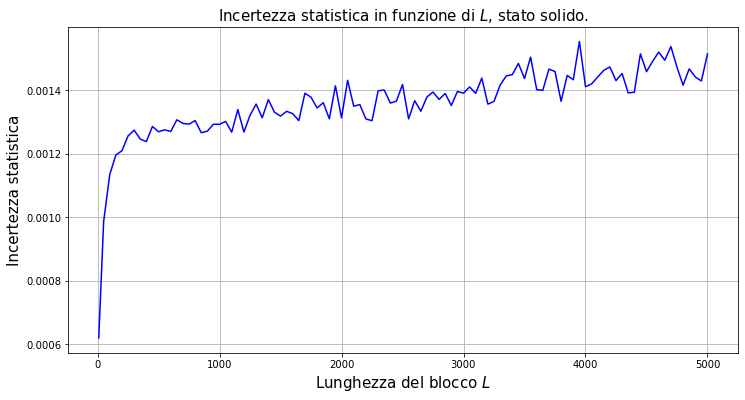

In [9]:
#Grafico dell'incertezza statistica in funzione della lunghezza del blocco.
plt.figure(figsize=(12,6))

x = L
y = err_s
plt.plot(x, y, color='blue')

plt.title("Incertezza statistica in funzione di $L$, stato solido.", fontsize=15)
plt.xlabel("Lunghezza del blocco $L$", fontsize=15)
plt.ylabel("Incertezza statistica", fontsize=15)

plt.grid(True)
plt.show()

In [ ]:
#Per stampare i valori dei vettori lunghezza e incertezza.
for k in range(101):
    print(k) 
    print(L[k])
    print(err_s[k])
    print("-----")

<span style="color:blue"> b. Incertezza statistica in funzione di $L$ per $U/N$ per lo stato liquido. </span>

In [10]:
#Valgono gli stessi commenti fatti per lo stato solido.
for i in range(0,101,1): #Per tutte le lunghezze definite nel vettore L.
    l = int(L[i]) #Lunghezza selezionata in questo ciclo.
    N = int(M/l) #Calcolo il numero di blocchi.
    sum_mean = 0
    sum_square = 0
    
    for iblk in range(0,N,1): #iblk va da 0 a N (escluso) a passi di 1. Per ogni blocco,
        somma = 0 
        for j in range(iblk*l,(iblk+1)*l,1): #all'interno di ciascun blocco.
            somma += m_l[j]
        
        media = somma/l 
        quadrato = media*media 
        sum_mean += media 
        sum_square += quadrato     
        mean_mean = sum_mean/(iblk+1)
        mean_square = sum_square/(iblk+1)
        
        if(iblk == 0):
            varianza = 0
            stdev = 0
            incertezza = 0   
        else:
            varianza = mean_square - mean_mean*mean_mean #Varianza per la media di 1 blocco, 2 blocchi, ... , N blocchi,
            stdev = np.sqrt(varianza) #lo stesso per la deviazione standard.
            incertezza = stdev/(np.sqrt(iblk)) #Incertezza stastistica. 
            
    err_l.append(incertezza) #Calcolata l'incertezza per il blocco di lunghezza l, la aggiungo al vettore err_l.

print("Finito!")

Finito!


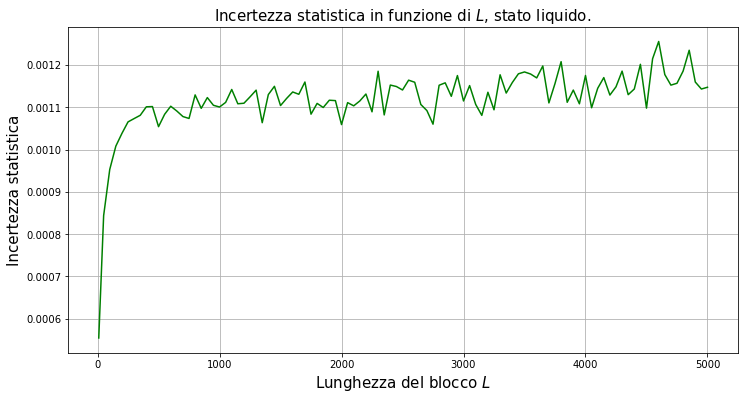

In [11]:
#Grafico dell'incertezza statistica in funzione della lunghezza del blocco.
plt.figure(figsize=(12,6))

x = L
y = err_l
plt.plot(x, y, color='green')

plt.title("Incertezza statistica in funzione di $L$, stato liquido.", fontsize=15)
plt.xlabel("Lunghezza del blocco $L$", fontsize=15)
plt.ylabel("Incertezza statistica", fontsize=15)

plt.grid(True)
plt.show()

<span style="color:blue"> c. Incertezza statistica in funzione di $L$ per $U/N$ per lo stato gassoso. </span>

In [12]:
#Valgono gli stessi commenti fatti per lo stato solido.
for i in range(0,101,1): #Per tutte le lunghezze definite nel vettore L.
    l = int(L[i]) #Lunghezza selezionata in questo ciclo.
    N = int(M/l) #Calcolo il numero di blocchi.
    sum_mean = 0
    sum_square = 0
    
    for iblk in range(0,N,1): #iblk va da 0 a N (escluso) a passi di 1. Per ogni blocco,
        somma = 0 
        for j in range(iblk*l,(iblk+1)*l,1): #all'interno di ciascun blocco.
            somma += m_g[j]
        
        media = somma/l 
        quadrato = media*media 
        sum_mean += media 
        sum_square += quadrato     
        mean_mean = sum_mean/(iblk+1)
        mean_square = sum_square/(iblk+1)
        
        if(iblk == 0):
            varianza = 0
            stdev = 0
            incertezza = 0   
        else:
            varianza = mean_square - mean_mean*mean_mean #Varianza per la media di 1 blocco, 2 blocchi, ... , N blocchi,
            stdev = np.sqrt(varianza) #lo stesso per la deviazione standard.
            incertezza = stdev/(np.sqrt(iblk)) #Incertezza stastistica.

    err_g.append(incertezza) #Calcolata l'incertezza per il blocco di lunghezza l, la aggiungo al vettore err_g.

print("Finito!")

Finito!


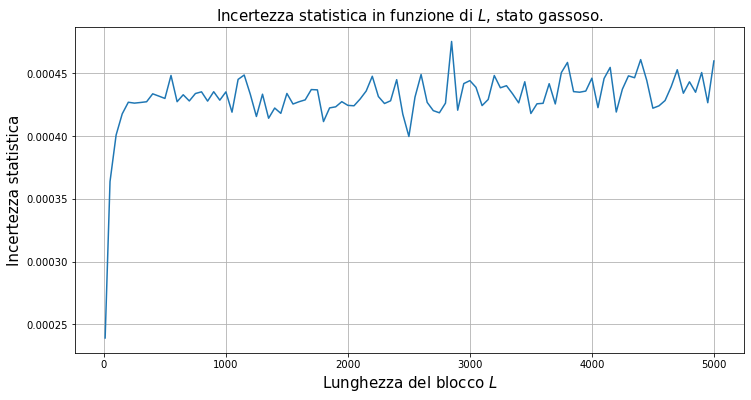

In [13]:
#Grafico dell'incertezza statistica in funzione della lunghezza del blocco.
plt.figure(figsize=(12,6))

x = L
y = err_g
plt.plot(x, y)

plt.title("Incertezza statistica in funzione di $L$, stato gassoso.", fontsize=15)
plt.xlabel("Lunghezza del blocco $L$", fontsize=15)
plt.ylabel("Incertezza statistica", fontsize=15)

plt.grid(True)
plt.show()

### Osservazioni

In tutti e tre i casi si osserva che all'inizio la curva cresce con un **andamento logaritimico** fino a quando si avvicina al suo asintoto: questo è il momento in cui l'incertezza **satura**, ossia non è più sottostimata e il blocco raggiunge la sua **lunghezza ideale**. Questo avviene in tutti e tre i casi per $L=1000$. 

Aumentando la lunghezza del blocco l'incertezza non tende più a questo valore: cresce o decresce tanto e questo oscillare si mantiene intorno al valore di saturazione. Quando la **lunghezza** dei blocchi è **piccola** l'incertezza viene **sottostimata** perché i valori su cui si fa la media sono pochi. Aumentando la lunghezza del blocco, aumenta anche l'incertezza, fino a raggiungere il suo valore ideale. 

**Aumentando** ancora di più la **lunghezza** del blocco, ci sono due comportamenti che si compensano. Da una parte ci aspettiamo che **l'incertezza cresca** perché ci sono più tipi di elementi. Dall'altra parte se il blocco è lungo, ci sono più valori su cui fare la media, quindi **la media è più precisa**. Questi due comportamenti **compensandosi** fanno in modo che, raggiunto il valore di saturazione, **l'incertezza oscilli** attorno a questo valore.

### <span style="color:blue">  Esercizio 07.3</span>

<span style="color:blue"> Includere nel codice il calcolo della funzione di distribuzione radiale $g(r)$, per $r$ compreso in $[0,L/2]$. </span>

Sia data una particella di riferimento distante $\vec r_{i}$ dall'origine e sia un'altra particella distante $\vec r_{j}$ dall'origine. Sia $r$ la distanza tra le due particelle. La **funzione di distribuzione radiale** $g(r)$ rappresenta la **probabilità** di trovare la seconda particella ad una distanza $r$ dalla prima. Si calcola con la seguente formula:
\begin{equation}
   g(r) = \frac{1}{\rho N \Delta V(r)}  \left\langle \sum_{i=1}^{N} \sum_{j=1 \neq i}^{N} \delta \left[\left|\vec r\right|-\left |\left(\vec r_{i} -\vec r_{j} \right)\right|\right]\right\rangle.
\end{equation}

La frazione rappresenta la normalizzazione che calcoliamo alla fine. I suoi termini indicano: $\rho$ la densità di particelle per unità di volume, $N$ il numero di particelle del sistema e $\Delta V(r)$ il volume del un guscio sferico in cui viene cercata la particella e si calcola così: 
\begin{equation}
   \Delta V(r) = \frac{4\pi}{3} \left[\left(r+dr\right)^{3}-r^{3}\right]. 
\end{equation}

La funzione di distribuzione radiale $g(r)$ è un **istogramma** i cui bin sono gli intervalli $dr$ delle distanze tra le particelle prese a coppie. Nel grafico sull'asse $x$ ci saranno le distanze e sull'asse $y$ il numero di conteggi per ogni distanza. Dobbiamo modificare il codice a noi donato per calcolare $g(r)$. La modifica viene inserita nella funzione *Measure*, dove è già implementato il calcolo di $dr$. I valori di $dr$ da calcolare sono $N\times(N-1)$, ossia per ogni particella, $N$ in tutto, si calcolano **tutte le distanze possibili** mettendola **in coppia** con tutte le altre $N-1$ particelle rimanenti. Per costruzione, la particella della quale calcoliamo tutte le distanze si trova nell'origine che in questo caso è il centro di una scatola quadrata di lato $L$; nel codice questa lunghezza è la variabile *box*. Tutte le altre particelle sono sparse per la scatola. Se la particella al centro è la $i-$esima, allora la particella $j-$esima andrà cercata nell'intervallo $(0,box/2)$ perché la scatola è simmetrica. Costruisco i bin dividendo questo intervallo in $100$ parti uguali. Quindi l'istogramma avrà in tutto $100$ bin, ciascuno di lunghezza $\frac{box}{200}$. 

Seguono i grafici di $g(r)$ per i tre stati della materia. Sull'asse $x$ ci sono le **distanze $r$ tra le particelle**, in unità del raggio di Bohr $a_{0}$. Sull'asse $y$ c'è **$g(r)$**, la funzione di distribuzione radiale, una funzione **proporzionale alla probabilità** di trovare una particella ad una distanza $r$ rispetto ad un'altra. Se $\rho$ è la densità di materia, possiamo scrivere così $g(r)$ per un gas ideale: 
\begin{equation}
  g^{(n)}_{N}(r_{1}, ... , r_{n}) = \frac{\rho^{(n)}_{N}(r_{1}, ... , r_{n})}{\prod_{i=1}^{n}\rho^{(1)}_{N}(r_{i})},
\end{equation}

essendo al numeratore la densità di particelle sul volume di tutto il blocco di materia e al denominatore il prodotto delle densità sul volume per la singola particella. Siccome le particelle sono identiche, possiamo fare il prodotto solo con la densità della particella $1$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

<span style="color:blue"> a. $g(r)$ per lo stato solido. </span>

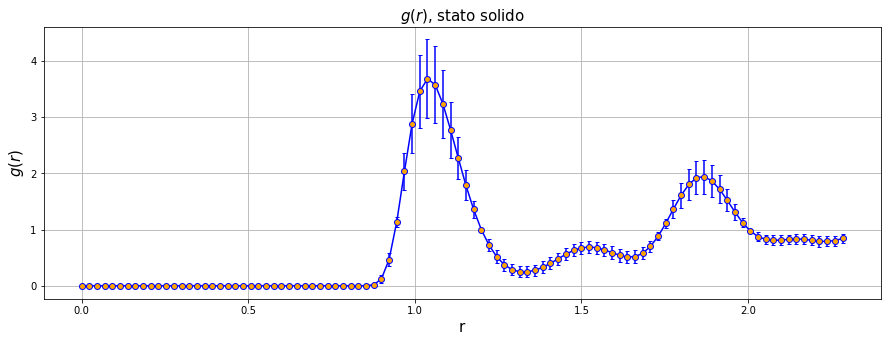

In [20]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("solid/gr_solid_MC.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.errorbar(x, f, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('$g(r)$, stato solido', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.show()

<span style="color:blue"> b. $g(r)$ per lo stato liquido. </span>

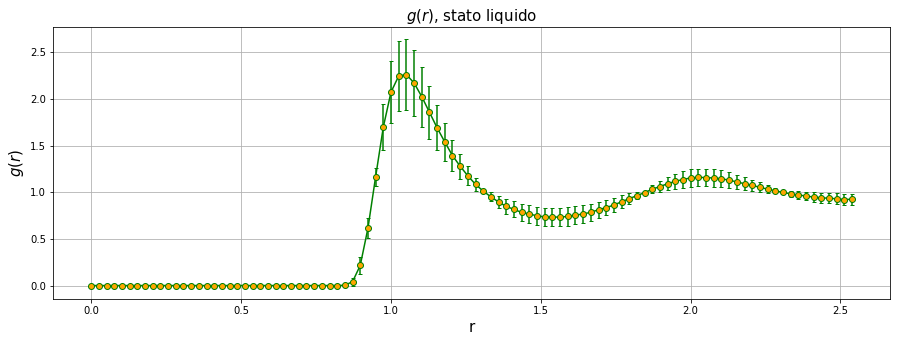

In [3]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("liquid/gr_liquid_MC.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.errorbar(x, f, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('$g(r)$, stato liquido', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.show()

<span style="color:blue"> c. $g(r)$ per lo stato gassoso. </span>

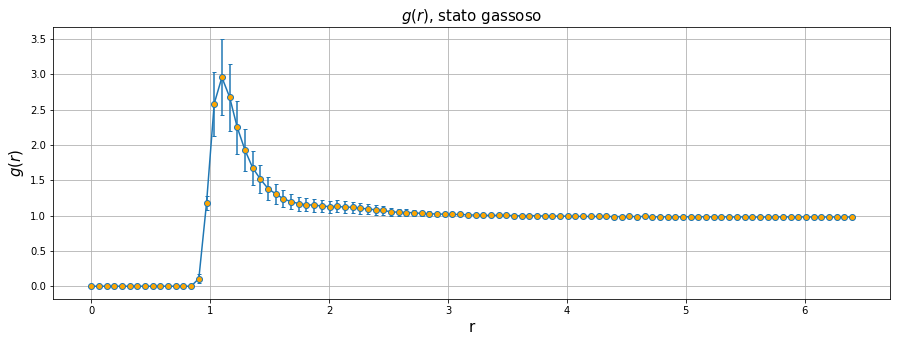

In [4]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("gas/gr_gas_MC.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.errorbar(x, f, yerr=error, capsize=2, marker='o', mfc='orange', ms=6,mew=1)

plt.title('$g(r)$, stato gassoso', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.show()

### Osservazioni

Osserviamo cosa succede in diversi intervalli di $r$, per tutti e tre gli stati della materia.

1. $r<0.9 a_{0}$. La funzione $g(r)$ fa $0$. In questo intervallo le **forze** tra le particelle sono **repulsive**: non ci sono particelle vicine ad un'altra entro questa distanza. La densità di particelle vicine è $0$, il numeratore della frazione è $0$ e $g(r)=0$. 
2. $0.9 a_{0}<r<2.0 a_{0}$. Il valore della funzione $g(r)$ inizia a salire, fino a raggiungere il suo picco massimo in $r\simeq 1.1 a_{0}$. Questo punto corrisponde al valore minimo del potenziale adiabatico ed è la **distanza di maggiore equilibrio** tra le particelle. Questo risultato è coerente con il fatto che nella materia all'equilibrio, nei solidi in particolare, gli atomi si trovano tra di loro ad una distanza che è circa $1$ raggio di Bohr. Dopo $g(r)$ decresce e poi risale fino a raggiungere dei nuovi picchi che si trovano in $r=1.8 a_{0}$ nello stato solido e in $r=2.0 a_{0}$ nello stato liquido. Questi sono **altri punti di equilibrio**. Nello stato gassoso invece questo picco non si presenta perché le particelle si respingono e si allontanano. 
3. $r>2.0 a_{0}$. La funzione $g(r)$ tende ad $1$. Questo è il caso delle **particelle non interagenti**. Affinché la funzione $g(r)$ faccia $1$, bisogna che nella frazione il numeratore sia uguale al denominatore, ossia se possiamo scrivere anche il numeratore in **forma fattorizzata**. Nel calcolo delle probabilità, quando gli eventi sono disgiunti, possiamo scrivere la probabilità totale come il prodotto delle probabilità dei singoli eventi. In questo caso, il numeratore deve essere scritto il forma fattorizzata, ossia la $\rho^{(n)}$ deve essere scritta come il prodotto delle singole $\rho^{(1)}$. Questo vuol dire che le particelle non interagiscono tra di loro e il risultato è $g(r)=1$. Questo è il caso ideale del **gas perfetto**, in cui le particelle non interagiscono fra di loro. Anche nella materia reale, a grande distanza, le particelle si comportano come nel gas perfetto e non interagiscono fra di loro.

### <span style="color:blue">  Esercizio 07.4</span>

<span style="color:blue"> 1. Con il codice modificato, esegui la simulazione Monte Carlo per l'Argon sottoposto ad un potenziale di Lennard-Jones, nelle unità di misura naturali, per le tre fasi della materia con i dati del testo dell'esercizio. Calcola le grandezze fisiche energia potenziale per particella $U/N$ e pressione $P$ e confrontale con i risultati ottenuti per la simulazione di Dinamica Molecolare (Esercitazione $4$). </span>

Eseguo la simulazione per il calcolo dell'energia potenziale interna per particella $U/N$ e della pressione $P$ utilizzando il codice a noi donato, nell'opzione Monte Carlo. Nell'Esercitazione $4$ abbiamo calcolato queste quantità usando lo stesso codice ma con l'opzione Dinamica Molecolare. L'obiettivo di questo esercizio è di **confrontare i risultati** ottenuti utilizzando le due opzioni del codice e **verificare che** i risultati **siano gli stessi**. 

Eseguire la simulazione tramite Dinamica Molecolare significa risolvere il problema **calcolando le traiettorie** delle particelle, risolvendo le equazioni del moto. Eseguire la simulazione tramite metodo Monte Carlo significa **campionare il peso di Boltzmann**, estraendo a caso, da una densità di probabilità, le energie delle particelle. Se risolvendo lo stesso problema, usando separatamente le due tecniche, otteniamo gli stessi risultati, vuol dire che, in un sistema in cui il numero di particelle tende all'infinito, la Meccanica Classica e la Meccanica Statistica **coincidono**. 

Seguono i grafici per le due grandezze fisiche da calcolare, per i tre stati della materia. Metto a confronto i risultati ottenuti con il metodo Monte Carlo e con la Dinamica Molecolare. I risultati qui riportati per la Dinamica Molecolare non sono gli stessi dell'Esercitazione $4$: questi mancano delle correzioni di coda. Per questa esercitazione ho ricalcolato i valori di $U/N$ e di $P$ per la Dinamica Molecolare, aggiungendo le correzioni di coda nel codice, per poterli confrontare con i valori ottenuti con la tecnica Monte Carlo.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Energia potenziale per particella $U/N$

<span style="color:blue"> a. Stato solido. </span>

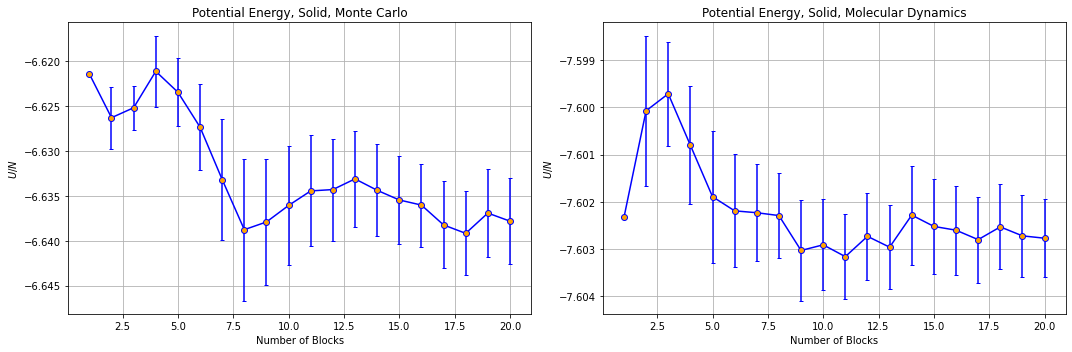

In [2]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, y, error = np.loadtxt("solid/output_epot_solid_MC.dat", unpack='true')
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Potential Energy, Solid, Monte Carlo')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.subplot(122)
x, f, y, error = np.loadtxt("solid/output_epot_solid_MD.dat", unpack='true')
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Potential Energy, Solid, Molecular Dynamics')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue"> b. Stato liquido. </span>

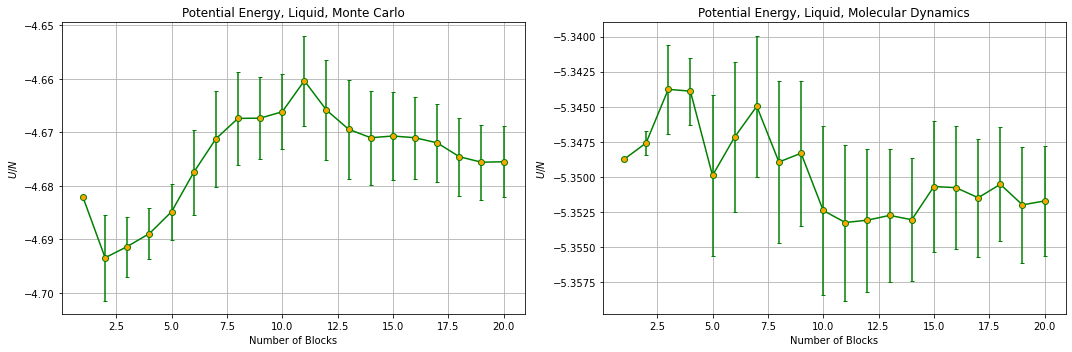

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, y, error = np.loadtxt("liquid/output_epot_liquid_MC.dat", unpack='true')
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Potential Energy, Liquid, Monte Carlo')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.subplot(122)
x, f, y, error = np.loadtxt("liquid/output_epot_liquid_MD.dat", unpack='true')
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Potential Energy, Liquid, Molecular Dynamics')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue"> c. Stato gassoso. </span>

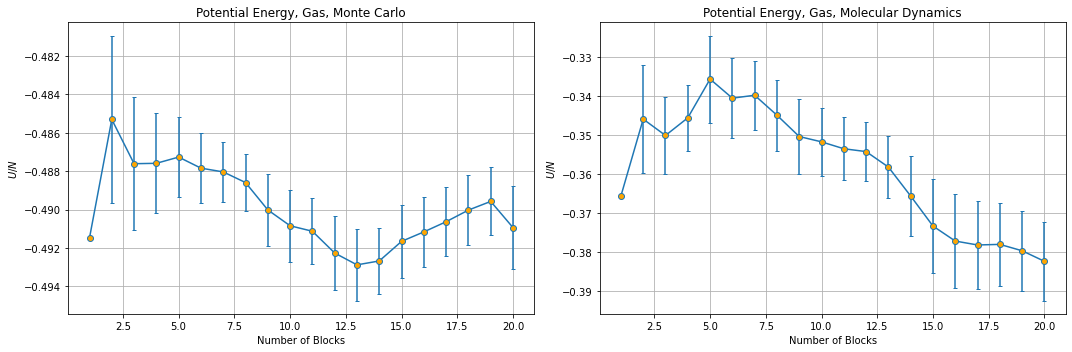

In [4]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, y, error = np.loadtxt("gas/output_epot_gas_MC.dat", unpack='true')
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Potential Energy, Gas, Monte Carlo')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.subplot(122)
x, f, y, error = np.loadtxt("gas/output_epot_gas_MD.dat", unpack='true')
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Potential Energy, Gas, Molecular Dynamics')
plt.xlabel('Number of Blocks')
plt.ylabel('$U/N$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Pressione $P$

<span style="color:blue"> a. Stato solido. </span>

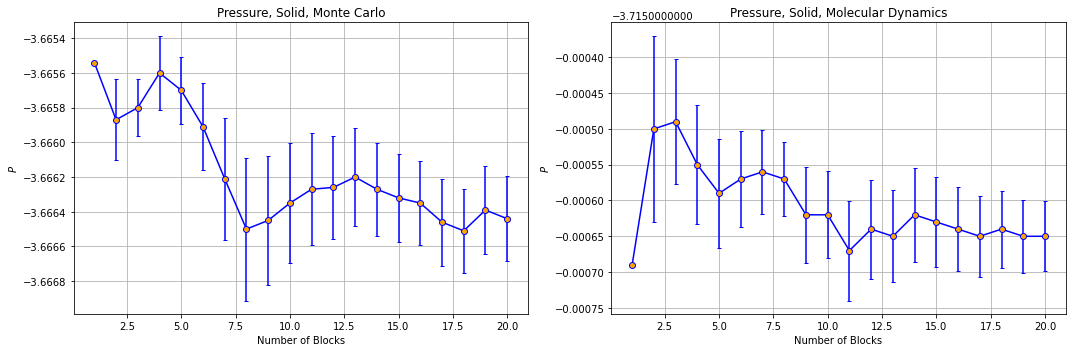

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, y, error = np.loadtxt("solid/output_pres_solid_MC.dat", unpack='true')
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Pressure, Solid, Monte Carlo')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.subplot(122)
x, f, y, error = np.loadtxt("solid/output_pres_solid_MD.dat", unpack='true')
plt.errorbar(x, y, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Pressure, Solid, Molecular Dynamics')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue"> b. Stato liquido. </span>

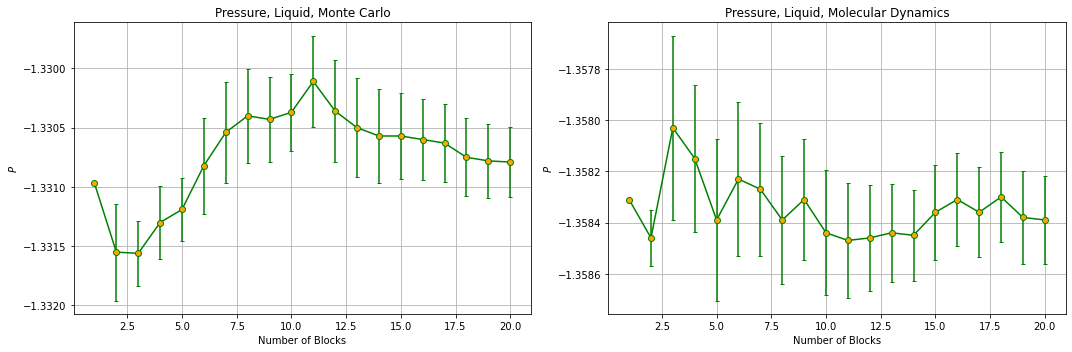

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, y, error = np.loadtxt("liquid/output_pres_liquid_MC.dat", unpack='true')
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Pressure, Liquid, Monte Carlo')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.subplot(122)
x, f, y, error = np.loadtxt("liquid/output_pres_liquid_MD.dat", unpack='true')
plt.errorbar(x, y, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Pressure, Liquid, Molecular Dynamics')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color:blue"> c. Stato gassoso. </span>

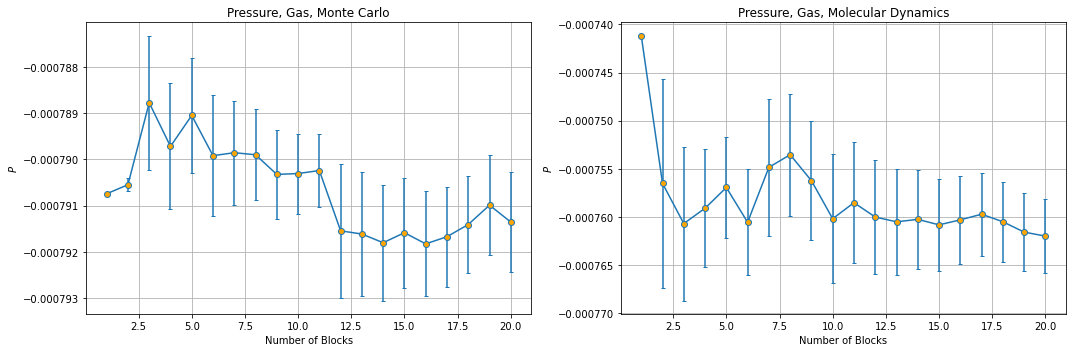

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(121)
x, f, y, error = np.loadtxt("gas/output_pres_gas_MC.dat", unpack='true')
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Pressure, Gas, Monte Carlo')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.subplot(122)
x, f, y, error = np.loadtxt("gas/output_pres_gas_MD.dat", unpack='true')
plt.errorbar(x, y, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('Pressure, Gas, Molecular Dynamics')
plt.xlabel('Number of Blocks')
plt.ylabel('$P$')
plt.grid(True)

plt.tight_layout()
plt.show()

### Osservazioni

La compatibilità tra le due tecniche è ottima per lo stato gassoso, buona per lo stato liquido e nei limiti per lo stato solido. E' migliore per la pressione che per l'energia potenziale. Nei tre casi, per la pressione, confrontando le due tecniche, otteniamo valori identici per lo stato gassoso, molto simili per lo stato liquido e non troppo simili per lo stato solido. Per lo stato solido la compatibilità non funziona molto bene, ma stiamo usando lo stesso codice che produce risultati molto buoni per lo stato gassoso. Quindi penso che il problema non sia il codice in sé, ma come il codice descrive le diverse fasi della materia. 

Un'altra possibile causa del problema può essere dovuta al fatto che il sistema che stiamo studiando è costituito da $N=108$ particelle, mentre il limite in cui i risultati dovrebbero coincidere è il *limite termodinamico*, ossia per $N$ che tende all'infinito. A questo punto, visto l'esiguo numero di particelle e visto che i risultati sono simili, possiamo dire che la compatibilità tra i risultati delle due tecniche è buona e che descrivono lo stesso sistema.

<span style="color:blue"> 2. Calcola $g(r)$ per i tre stati della materia, con la tecnica della Dinamica Molecolare e confrontala con i risultati ottenuti con il metodo Monte Carlo. </span> 

Per ciascuno dei tre stati della materia seguono due grafici. Il primo è la funzione di distribuzione radiale $g(r)$ calcolata con la tecnica della Dinamica Molecolare. Il secondo è un confronto tra le $g(r)$ calcolate con tecnica Monte Carlo e con tecnica della Dinamica Molecolare. Quest'ultima nel confronto è sempre colorata in arancione. Nel grafico di confronto non ho riportato le barre di errore, ma soltanto il profilo delle $g(r)$, per poterle osservare meglio.

<span style="color:blue"> a. $g(r)$ per lo stato solido. </span>

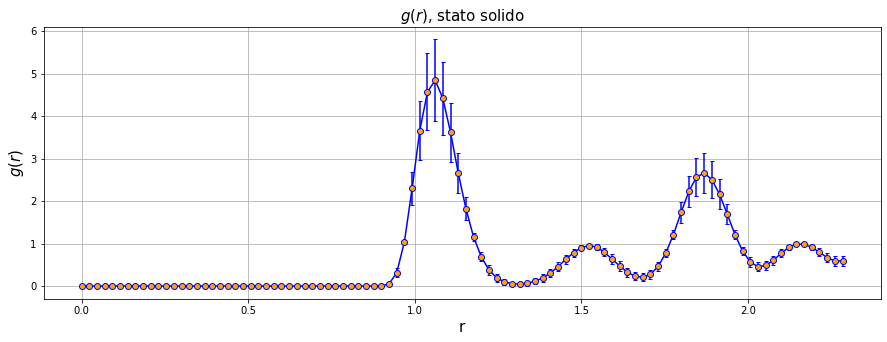

In [32]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("solid/gr_solid_MD.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.errorbar(x, f, yerr=error, color='blue', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('$g(r)$, stato solido', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.show()

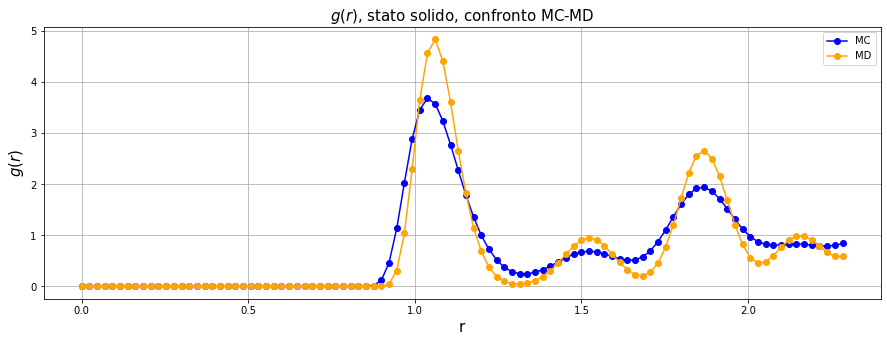

In [11]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("solid/gr_solid_MC.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.plot(x,f, marker='o', color='blue', label='MC')

x, f, error = np.loadtxt("solid/gr_solid_MD.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.plot(x,f, marker='o', color='orange', label='MD')

plt.title('$g(r)$, stato solido, confronto MC-MD', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.legend()
plt.show()

<span style="color:blue"> b. $g(r)$ per lo stato liquido. </span>

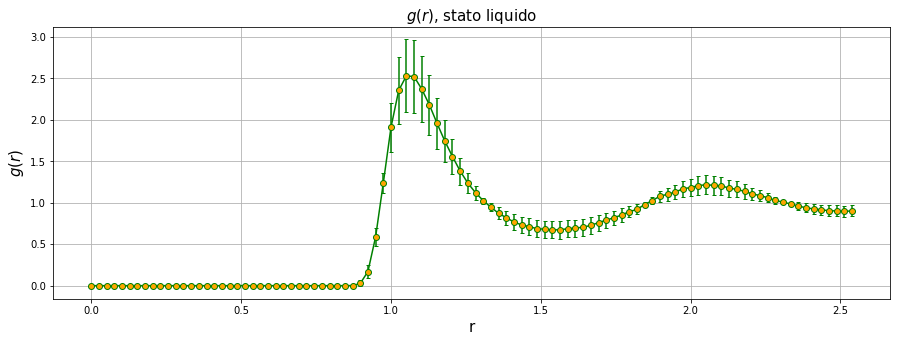

In [22]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("liquid/gr_liquid_MD.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.errorbar(x, f, yerr=error, color='green', capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('$g(r)$, stato liquido', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.show()

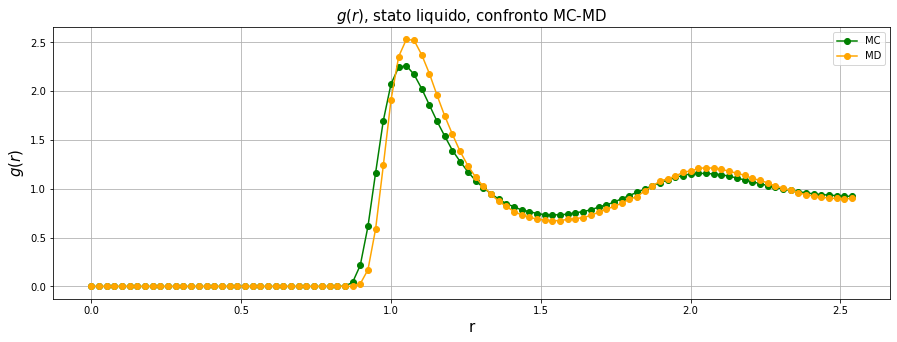

In [12]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("liquid/gr_liquid_MC.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.plot(x,f, marker='o', color='green', label='MC')

x, f, error = np.loadtxt("liquid/gr_liquid_MD.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.plot(x,f, marker='o', color='orange', label='MD')

plt.title('$g(r)$, stato liquido, confronto MC-MD', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.legend()
plt.show()

<span style="color:blue"> c. $g(r)$ per lo stato gassoso. </span>

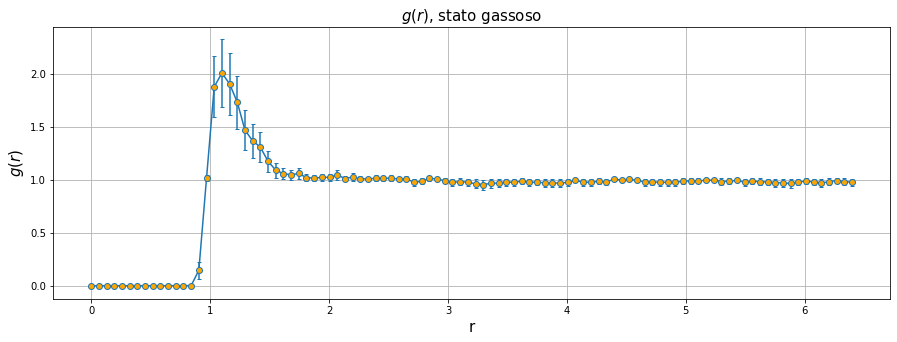

In [23]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("gas/gr_gas_MD.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.errorbar(x, f, yerr=error, capsize=2, marker='o', mfc='orange', ms=6, mew=1)

plt.title('$g(r)$, stato gassoso', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.show()

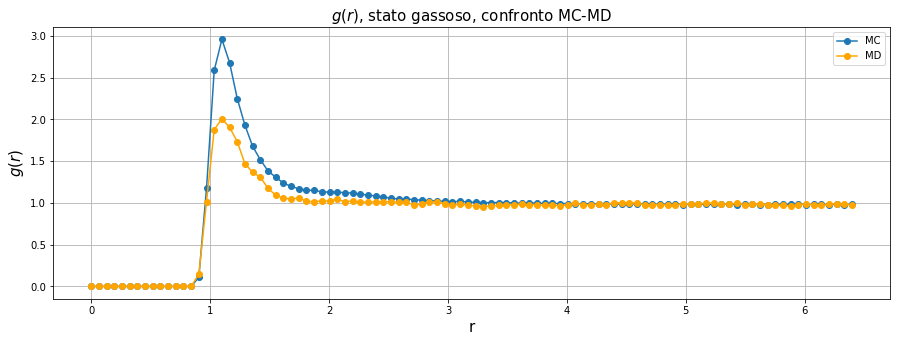

In [13]:
plt.figure(figsize=(15,5))
x, f, error = np.loadtxt("gas/gr_gas_MC.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.plot(x,f, marker='o', label='MC')

x, f, error = np.loadtxt("gas/gr_gas_MD.dat", usecols=(0,1,2), delimiter="  ", unpack='true')
plt.plot(x,f, marker='o', color='orange', label='MD')

plt.title('$g(r)$, stato gassoso, confronto MC-MD', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)

plt.grid(True)
plt.legend()
plt.show()

### Osservazioni

Per i tre stati della materia, per entrambe le tecniche, le $g(r)$ hanno lo stesso profilo. Hanno lo stesso numero di picchi e di lacune e i loro massimi e i loro minimi si trovano negli stessi punti, ossia per gli stessi valori di $r$. Quello che cambia è l'altezza dei picchi. Sono comunque confrontabili.

### Conclusioni

L'obiettivo di questo esperimento era **calcolare le grandezze fisiche** energia potenziale per particella $U/N$ e pressione $P$ per l'Argon, per i tre stati della materia, nelle condizioni termodinamiche date nel testo del problema, **con un algoritmo** che sfrutta il metodo **Monte Carlo** per campionare il peso di Boltzmann per estrarre le energie delle particelle, a partire dalle quali si calcolano le grandezze fisiche desiderate. Prima di fare questo abbiamo dovuto prendere due accorgimenti. Il primo è calcolare e aggiungere le **correzioni di coda** per l'energia potenziale e per la pressione, il secondo è calcolare la **lunghezza ideale del blocco** di valori con cui fare l'esperimento, tendendo conto della funzione di **autocorrelazione e** dell'**oscillazione dell'incertezza** all'aumentare della lunghezza del blocco. 

Fatto questo, è iniziata la simulazione vera e propria per il calcolo di $U/N$ e di $P$. Trovati i **valori**, li abbiamo **confrontati con** i valori che si ottengono per le stesse quantità fisiche, per lo stesso sistema, nelle stesse condizioni termodinamiche, ma con il codice che sfrutta la tecnica della **Dinamica Molecolare** per il calcolo delle traiettorie delle particelle. In entrambi i casi abbiamo **calcolato** anche la **funzione di distribuzione radiale** $g(r)$. L'obiettivo del confronto era **verificare** che **entrambi i metodi** portano agli **stessi risultati**.

E' riuscita **bene la parte** dell'aggiunta nel codice **delle correzioni di coda**. Se si confrontano questi risultati con quelli dell'Esercitazione $4$, si osserva che i valori di $U/N$ e di $P$ si sono abbassati di una quantità molto vicina a quella indicata dalle correzioni di coda calcolate per ogni caso. Non si abbassano perfettamente di quel valore perché i valori estratti a caso a cui sommare le correzioni costanti sono diversi. 

E' possibile ritenere **buona la convergenza** per il calcolo di $U/N$ e di $P$, sia per MC, che va dal $50\%$ al $70\%$, sia per MD, che va dal $70\%$ al $90\%$. 

Il punto che **non** ritengo riuscito **molto bene** è il **confronto** tra MC ed MD per il calcolo di $U/N$. Viene per lo stato solido $-7.6$ contro $-6.6$, per lo stato liquido $-4.68$ contro $-5.35$ per lo stato gassoso $-0.49$ contro $-0.35$. Certo l'ordine di grandezza è lo stesso e la differenza tra i valori non è enorme, però se fossero stati **più vicini sarebbe stato meglio**. Viene invece **abbastanza bene** il **confronto** tra MC ed MD per il calcolo di $P$. La differenza per i valori è alla seconda cifra decimale sia per lo stato solido sia per lo stato liquido e alla quinta cifra decimale per lo stato gassoso. Ho ipotizzato che questo sia dovuto al fatto che abbiamo studiato un sistema con un numero di particelle finito e non nel limite termodinamico, in cui $N$ tende all'infinito.

Sono **confrontabili** tra loro le $g(r)$ relative allo stesso stato della materia: hanno lo stesso profilo e i picchi e le lacune si trovano negli stesse posizioni. 

Osservando tutti i risultati, ritengo che complessivamente l'**esperimento** sia **riuscito**, ma **non** in una maniera **brillante** in ogni suo punto. 